<a href="https://colab.research.google.com/github/nuvita97/BigMart-Sales-Prediction/blob/main/BigMartSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA MINING 
1. Problem Understanding: Feature? Target? Classification or Regression?
2. Data Understanding: Missing Values? Outlier(Noise)? Inconsistent? Imbalanced? Skewness? 
3. Feature Understanding: EDA with Visualization on Univariate, BiVariate and MultiVariate Analysis
4. Feature Engineering: Skewness/Inconsistent/Missing/Outlier Handling, Feature Enrichment, Feature Transformation, Feature Selection, Feature Encoding, Feature Scaling (Normalization & Standardization)
5. Dataset Partition : Imblanced Handling, Train Test Split 
6. Data Modelling : Try many ML methods
7. Data Evaluation : Display Metrics for Classification (Accuracy, Precision, Recall), Display Metrics for Regression (R2Score, MSE, RMSE)
8. Hyper-parameter Tuning : Tuning parameters: Cross Validation (CV), GridSearchCV, Regularization (L1, L2 penalty)
9. Build the pipeline with the best Model with the best parametersChoose best hyper-parameters and build best models
10. Conclusion

In [2]:
!git clone https://github.com/nuvita97/BigMart-Sales-Prediction

import os
path = 'BigMart-Sales-Prediction'
os.chdir(path)
os.listdir()

Cloning into 'BigMart-Sales-Prediction'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.


['.git',
 'README.md',
 'Train.csv',
 'Description.png',
 'train_modified.csv',
 'test_modified.csv',
 'Test.csv']

## 1. Problem Understanding

- Feature of Item: 'Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 
- Feature of Outlet: 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'
- Target: "Item_Outlet_Sales"
- Type of MLs Approach: Regression

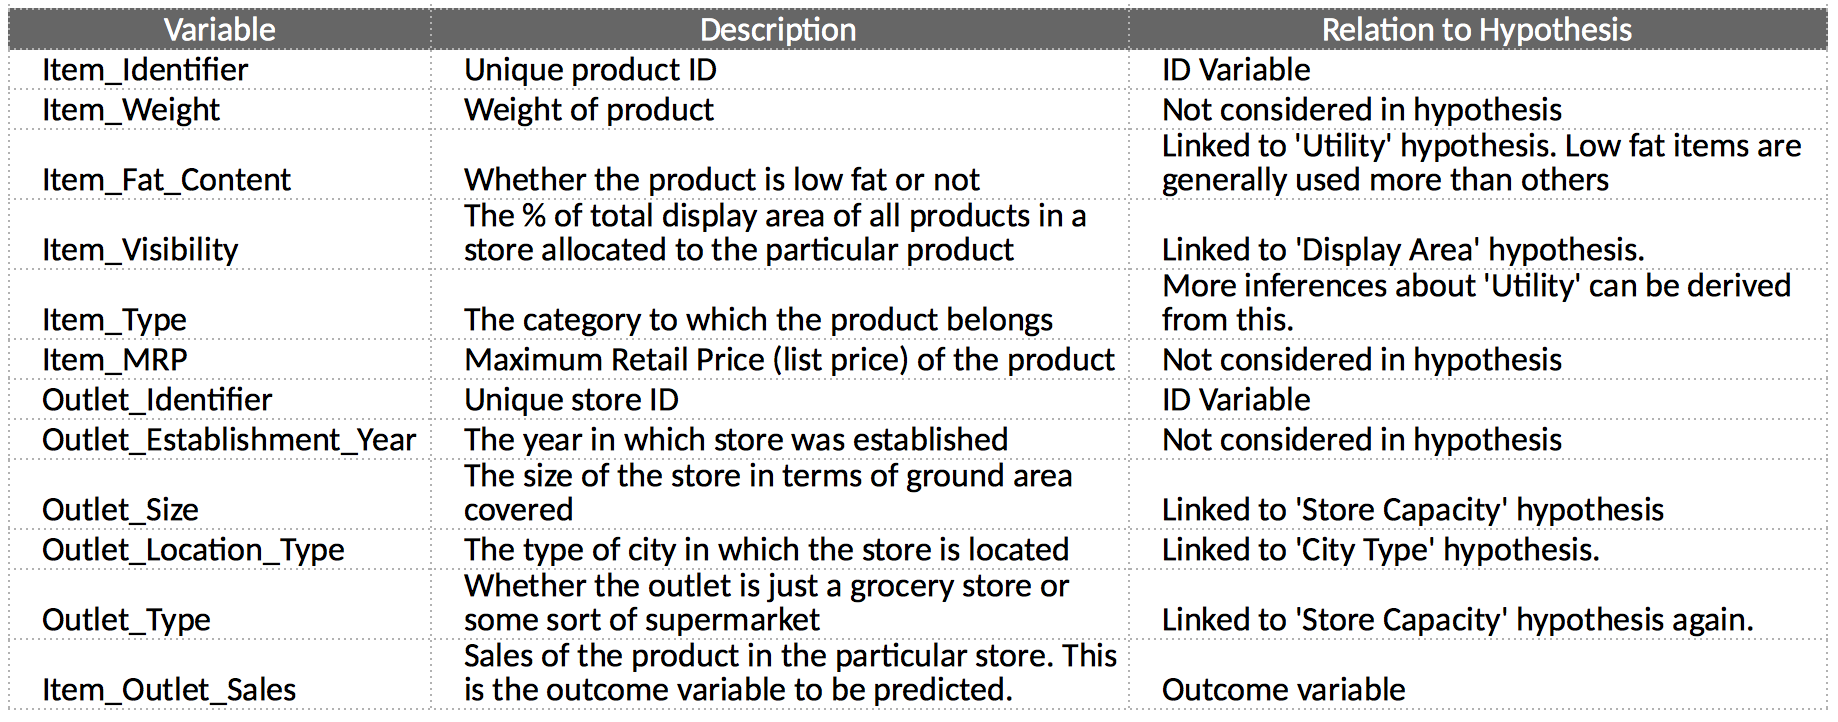

In [3]:
from IPython.display import display, Image
display(Image(filename = 'Description.png'))

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

display(train.head())
display(test.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## 2. Data Understanding

- Missing values: 'Item_Weight' (17%), 'Outlet_Size' (28%), 'Item_Visibility' (6%)
- Outliers: 'Item_Visibility'
- Inconsistent: 'Item_Fat_Content'
- Imbalanced: none
- Skewness: none

In [15]:
# Combine train & test
train['source'] = 'train'
test['source'] = 'test'
test['Item_Outlet_Sales'] = 0.0

df = pd.concat([train, test], sort = False, ignore_index = True)
display(df.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [16]:
print(train.shape)
print(test.shape)
print(df.shape)

(8523, 13)
(5681, 13)
(14204, 13)


In [43]:
display(df.describe())
display(df.describe(include = np.object))

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
count,14204,14204,14204,14204,10188,14204,14204,14204
unique,1559,5,16,10,3,3,4,2
top,FDU15,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1,train
freq,10,8485,2013,1559,4655,5583,9294,8523


In [21]:
# Missing percent
df.isnull().sum()/df.shape[0] * 100

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
source                        0.000000
dtype: float64

In [31]:
# Percent of 'Item_Visibility' = 0
(df['Item_Visibility'].values == 0).sum()/df.shape[0] * 100

6.188397634469164

In [42]:
# Find outliers by statistics
df1 = df[df['Item_Visibility'] > 0]   # Remove 0 values

stats = df1.describe()
for col in stats.columns:
  meanV, stdV = stats.loc['mean', col], stats.loc['std', col]
  minV, maxV = stats.loc['min', col], stats.loc['max', col]
  q1, q2, q3 = stats.loc['25%', col], stats.loc['50%', col], stats.loc['75%', col]
  iqr = q3 - q1
  confident_range_1 = [round(meanV - 3*stdV, 2), round(meanV + 3*stdV, 2)]
  confident_range_2 = [round(q1 - 1.5*iqr, 2), round(q3 + 1.5*iqr, 2)]
  print(f'{col}: \n\t min {minV} - max {maxV} \n\t range1 {confident_range_1} - range2 {confident_range_2}')

Item_Weight: 
	 min 4.555 - max 21.35 
	 range1 [-1.15, 26.75] - range2 [-3.35, 28.81]
Item_Visibility: 
	 min 0.003574698 - max 0.328390948 
	 range1 [-0.08, 0.22] - range2 [-0.07, 0.2]
Item_MRP: 
	 min 31.29 - max 266.8884 
	 range1 [-44.93, 327.14] - range2 [-43.43, 323.43]
Outlet_Establishment_Year: 
	 min 1985.0 - max 2009.0 
	 range1 [1972.7, 2022.96] - range2 [1961.5, 2029.5]
Item_Outlet_Sales: 
	 min 0.0 - max 13086.9648 
	 range1 [-3785.48, 6400.42] - range2 [-3245.77, 5409.62]


In [45]:
# Find Inconsistent values
CatFeatures = [col for col in df.columns if df[col].dtypes in ["object"]]
NumFeatures = [col for col in df.columns if df[col].dtypes not in ["object"]]
print("Numeric Features : ", NumFeatures)
print("Categorical Features : ", CatFeatures)

for col in CatFeatures:
  print(f"\n{col} : \n{df[col].value_counts()}")

Numeric Features :  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
Categorical Features :  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source']

Item_Identifier : 
FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content : 
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Item_Type : 
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others 

In [46]:
# Imbalanced (skew < 4) 
df["Item_Outlet_Sales"].skew()

1.5446838706795227

In [47]:
# Skewness
df.skew()

Item_Weight                  0.101309
Item_Visibility              1.195175
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.544684
dtype: float64